# Read NH summer insolation

In [28]:
# read the insolation data '65N_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/65N_inso_mean90_-1Ma_0_inter100.txt'
inso60n=pd.read_csv(path, sep='\s+', header=None)
# rename columns
inso60n.columns=['age', 'insolation']
# age*-1000
inso60n['age']=-1*inso60n['age']*1000
# filp the dataframe
inso60n=inso60n.iloc[::-1]
# convert inso60s to csv
# save the data to csv under /data_fig3
# inso60n.to_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv', index=False)

inso60n

,age,insolation
10000,-0.0,480.368585
9999,100.0,480.417135
9998,200.0,480.477639
9997,300.0,480.550430
9996,400.0,480.635856
...,...,...
4,999600.0,534.872778
3,999700.0,534.977900
2,999800.0,535.040805
1,999900.0,535.061525


# Read SH summer insolation

In [29]:
# read the insolation data '65S_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/inso60S_1Ma_0_inter100_meanlongitude_270.txt'
inso60s=pd.read_csv(path, sep='\s+', header=None)
# rename columns
inso60s.columns=['age', 'insolation']
# age*-1000
inso60s['age']=-1*inso60s['age']*1000
# filp the dataframe
inso60s=inso60s.iloc[::-1]
# convert inso60s to csv
# save the data to csv under /data_fig3
# inso60s.to_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv', index=False)

inso60s

,age,insolation
10000,-0.0,511.037082
9999,100.0,511.404930
9998,200.0,511.758942
9997,300.0,512.098589
9996,400.0,512.423324
...,...,...
4,999600.0,464.574426
3,999700.0,464.304934
2,999800.0,464.063080
1,999900.0,463.848860


# Intergrated annual insolation

In [30]:
path='D:/VScode/Last_deglaciation/data_fig3/'

# read Huybers P &Denton-2008-NGeo-65S.txt
import pandas as pd
# df_inter_ann = pd.read_csv(path + 'Huybers_Denton_2008_NGeo_65S.txt', sep='\s+', header=0,skiprows=8)
df_inter_ann = pd.read_csv(path + 'j_60south.txt', sep='\s+', header=0,skiprows=8)
# rename column NaN to age
df_inter_ann.rename(columns={'NaN':'age'}, inplace=True)
# age culumn to ka
df_inter_ann['age']=df_inter_ann['age']*1000
# save the data to csv under /data_fig3
# df_inter_ann.to_csv(path+'df_inter_ann.csv', index=False)

# extract column 'age' and '275'
df_inter_ann=df_inter_ann[['age','275']]


df_inter_ann

,age,275
0,0,5.495
1,1000,5.517
2,2000,5.532
3,3000,5.546
4,4000,5.556
...,...,...
4996,4996000,5.380
4997,4997000,5.378
4998,4998000,5.377
4999,4999000,5.379


# CO2 data

In [31]:
import pandas as pd

df_wdc_co2 = pd.read_excel('D:/VScode/PastClimatePlots/data_for_plots.xlsx', sheet_name='WDC CO2', skiprows=1)
# rename columns to age, co2 and co2_err
df_wdc_co2.columns=['age', 'co2', 'co2_err']
df_wdc_co2

,age,co2,co2_err
0,8806.73,267.90,3.37
1,8900.03,265.45,1.43
2,8995.02,268.86,1.42
3,9091.10,263.95,1.85
4,9188.26,270.60,3.85
...,...,...,...
656,65530.00,210.15,0.48
657,65911.80,210.32,0.53
658,66332.96,211.87,0.86
659,66729.17,212.07,0.80


# LGMR and class median

In [33]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat= xr.open_dataset('D:/VScode/Last_deglaciation/data/LGMR_SAT_ens.nc')
ds_sat

import numpy as np
weight = np.cos(np.deg2rad(ds_sat['lat']))

# set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

ds_sat['weight']=weight

# read the label_check
import pickle
with open('D:/VScode/Last_deglaciation/ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

label_check_reshaped = label_check.reshape(96,144)

LGRM_age=ds_sat['age'].values

In [ ]:



import numpy as np
from toolbox import change_point_functions as cpf

sat_shape = ds_sat['sat'].isel(nEns=0).shape

# Initialize a list to store the weighted average curves for all iterations
all_weighted_avg_curves_checked = []

for i in range(len(ds_sat['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat.isel(nEns=i)
    
    ds_sat_i['class_label'] = (('lat', 'lon'), label_check_reshaped)
    # ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
    
    weighted_avg_curves_checked = {}

    for j in range(4):
        # Calculate the weighted average curve for class j
        weighted_avg_curves_checked[j] = cpf.cal_weighted_average_curve(ds_sat_i, j,sat_var_name='sat')
    
    # Append the dictionary of weighted average curves for the current iteration to the list
    all_weighted_avg_curves_checked.append(weighted_avg_curves_checked)

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\an

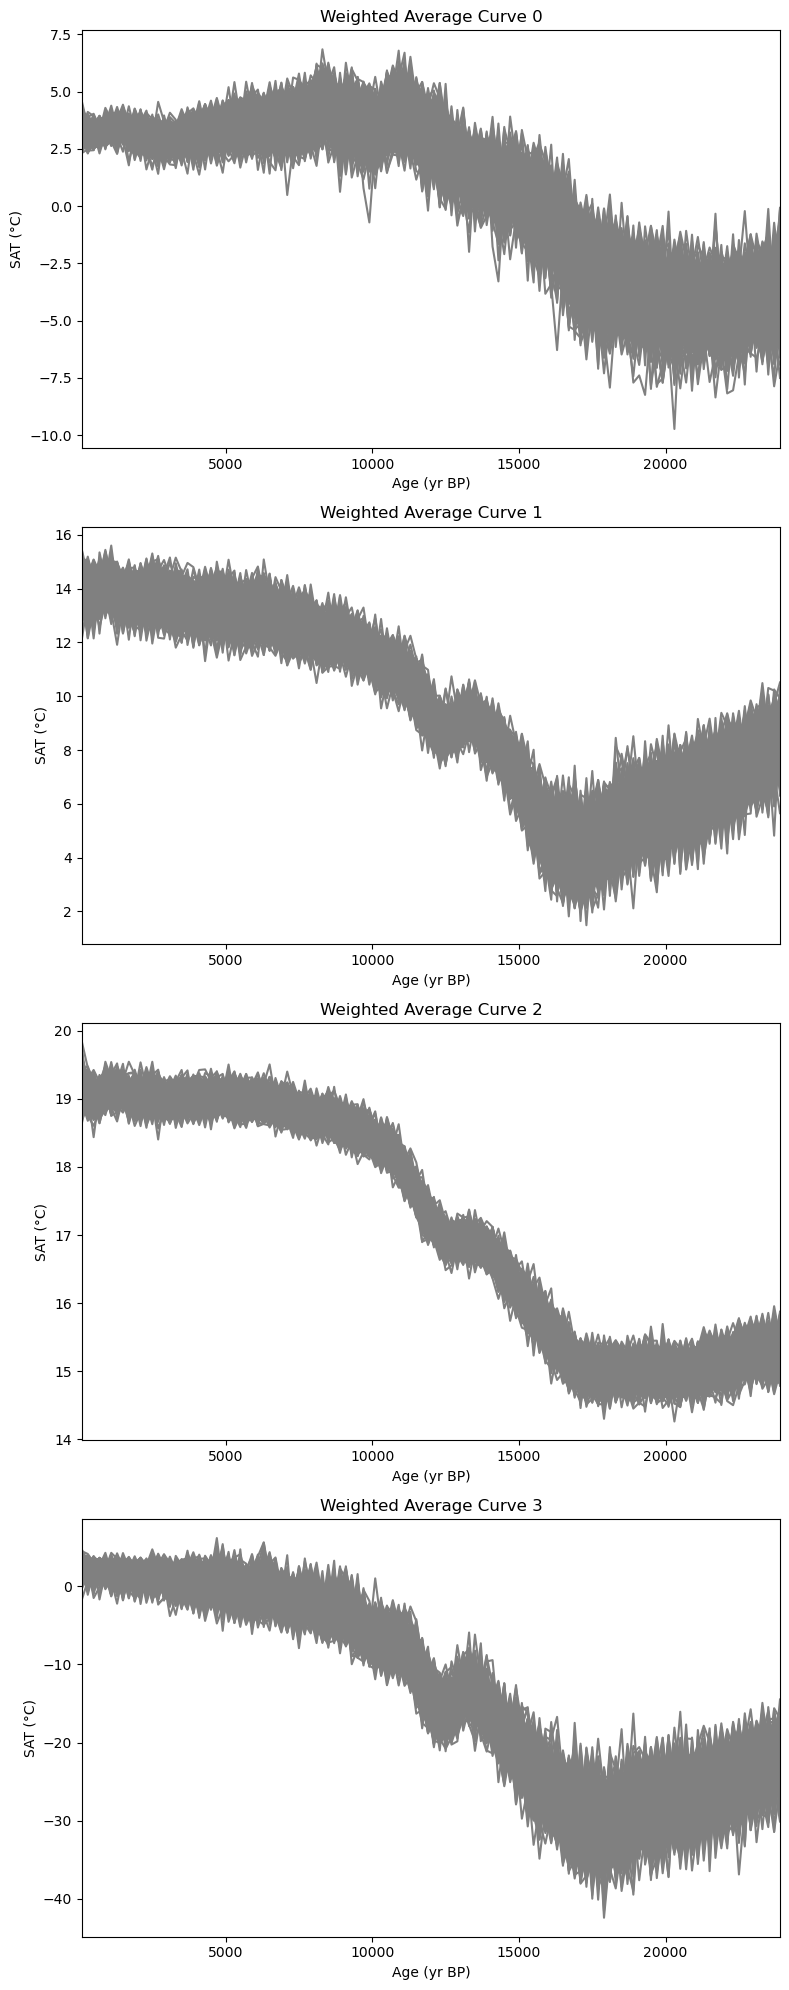

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


all_weighted_avg_curves=all_weighted_avg_curves_checked

# Set up the figure and GridSpec
fig = plt.figure(figsize=(8, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 1, figure=fig)

# Plot each weighted_avg_curves[i]
for i in range(4):
    # Extract the i-th weighted average curve from each set in all_weighted_avg_curves, if it exists
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    ax = fig.add_subplot(gs[i, 0])
    # Loop through each curve in weighted_avg_curves_k and plot
    for idx,curve in enumerate(weighted_avg_curves_k):
        ax.plot(ds_sat['age'].values,curve,color='grey')  # Use the loop index as the ensemble identifier

    ax.set_title(f'Weighted Average Curve {i}')
    ax.set_xlabel('Age (yr BP)')  # Assuming 'Index' is the correct x-axis label
    ax.set_ylabel('SAT (°C)')  # Assuming 'Value' is the correct y-axis label
    # set x-axis range
    ax.set_xlim(np.min(ds_sat['age'].values), np.max(ds_sat['age'].values))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
LGRM_age=ds_sat['age'].values
# print the shape of LGRM_age
print(f"Shape of LGRM_age: {LGRM_age.shape}")



import numpy as np
import pandas as pd

transposed_arrays = {}
LGMR_medians = {}

for i in range(4):
    # Extract the weighted average curves for class i
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]
    print(f"Number of curves in class {i}: {len(weighted_avg_curves_k)}")
    print(f"Data type: {type(weighted_avg_curves_k)}")

    # Convert the list of ndarrays to a numpy array and then transpose it
    array_k = np.array(weighted_avg_curves_k)
    transposed_array_k = array_k.T  # Transpose: columns now represent different measurements from the same curve

    # Save the transposed array in the dictionary
    transposed_arrays[f'class_{i}'] = transposed_array_k

    # Calculate and save the median across columns
    LGMR_medians[f'class_{i}_medians'] = np.median(transposed_array_k, axis=1)  # Axis 1 computes the median across columns

    # print the shape of the median
    print(f"Shape of the median for class {i}: {LGMR_medians[f'class_{i}_medians'].shape}")

# Save the LGMR data to folder 'processed_data'
with open('D:/VScode/Last_deglaciation_causality/processed_data/LGMR_data.pkl', 'wb') as file:
    pickle.dump({
        'LGRM_age': LGRM_age,
        'transposed_arrays': transposed_arrays,
        'LGMR_medians': LGMR_medians
    }, file)

Shape of LGRM_age: (120,)
Number of curves in class 0: 500
Data type: <class 'list'>
Shape of the median for class 0: (120,)
Number of curves in class 1: 500
Data type: <class 'list'>
Shape of the median for class 1: (120,)
Number of curves in class 2: 500
Data type: <class 'list'>
Shape of the median for class 2: (120,)
Number of curves in class 3: 500
Data type: <class 'list'>
Shape of the median for class 3: (120,)


In [7]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat= xr.open_dataset('D:/VScode/Last_deglaciation/data/LGMR_SAT_ens.nc')
ds_sat

import numpy as np
weight = np.cos(np.deg2rad(ds_sat['lat']))

# set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

ds_sat['weight']=weight

# load the class labels
data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat_label = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')
ds_sat_label

label_check_reshaped=ds_sat_label['class_label'].values


import numpy as np
from toolbox import change_point_functions as cpf

sat_shape = ds_sat['sat'].isel(nEns=0).shape

# Initialize a list to store the weighted average curves for all iterations
all_weighted_avg_curves_checked = []

for i in range(len(ds_sat['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat.isel(nEns=i)
    
    ds_sat_i['class_label'] = (('lat', 'lon'), label_check_reshaped)
    # ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
    
    weighted_avg_curves_checked = {}

    for j in range(4):
        # Calculate the weighted average curve for class j
        weighted_avg_curves_checked[j] = cpf.cal_weighted_average_curve(ds_sat_i, j,sat_var_name='sat')
    
    # Append the dictionary of weighted average curves for the current iteration to the list
    all_weighted_avg_curves_checked.append(weighted_avg_curves_checked)




import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


all_weighted_avg_curves=all_weighted_avg_curves_checked

# Set up the figure and GridSpec
fig = plt.figure(figsize=(8, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 1, figure=fig)

# Plot each weighted_avg_curves[i]
for i in range(4):
    # Extract the i-th weighted average curve from each set in all_weighted_avg_curves, if it exists
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    ax = fig.add_subplot(gs[i, 0])
    # Loop through each curve in weighted_avg_curves_k and plot
    for idx,curve in enumerate(weighted_avg_curves_k):
        ax.plot(ds_sat['age'].values,curve,color='grey')  # Use the loop index as the ensemble identifier

    ax.set_title(f'Weighted Average Curve {i}')
    ax.set_xlabel('Age (yr BP)')  # Assuming 'Index' is the correct x-axis label
    ax.set_ylabel('SAT (°C)')  # Assuming 'Value' is the correct y-axis label
    # set x-axis range
    ax.set_xlim(np.min(ds_sat['age'].values), np.max(ds_sat['age'].values))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\xarray\coding\variables.py:147: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
d:\Users\User\an

KeyboardInterrupt: 

In [ ]:
LGRM_age=ds_sat['age'].values
# print the shape of LGRM_age
print(f"Shape of LGRM_age: {LGRM_age.shape}")



import numpy as np
import pandas as pd

transposed_arrays = {}
LGMR_medians = {}

for i in range(4):
    # Extract the weighted average curves for class i
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]
    print(f"Number of curves in class {i}: {len(weighted_avg_curves_k)}")
    print(f"Data type: {type(weighted_avg_curves_k)}")

    # Convert the list of ndarrays to a numpy array and then transpose it
    array_k = np.array(weighted_avg_curves_k)
    transposed_array_k = array_k.T  # Transpose: columns now represent different measurements from the same curve

    # Save the transposed array in the dictionary
    transposed_arrays[f'class_{i}'] = transposed_array_k

    # Calculate and save the median across columns
    LGMR_medians[f'class_{i}_medians'] = np.median(transposed_array_k, axis=1)  # Axis 1 computes the median across columns

    # print the shape of the median
    print(f"Shape of the median for class {i}: {LGMR_medians[f'class_{i}_medians'].shape}")

# Save the LGMR data to folder 'processed_data'
with open('D:/VScode/Last_deglaciation_causality/processed_data/LGMR_data.pkl', 'wb') as file:
    pickle.dump({
        'LGRM_age': LGRM_age,
        'transposed_arrays': transposed_arrays,
        'LGMR_medians': LGMR_medians
    }, file)

In [ ]:
# import xarray as xr
# import numpy as np
# import pandas as pd
# import pickle

# data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
# ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# LGRM_age=ds_sat['age'].values
# # print the shape of LGRM_age
# print(f"Shape of LGRM_age: {LGRM_age.shape}")

# # read the all_weighted_avg_curves
# import pickle
# with open('D:/VScode/Last_deglaciation/ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
#     all_weighted_avg_curves = pickle.load(f)


# import numpy as np
# import pandas as pd

# transposed_arrays = {}
# LGMR_medians = {}

# for i in range(4):
#     # Extract the weighted average curves for class i
#     weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]
#     print(f"Number of curves in class {i}: {len(weighted_avg_curves_k)}")
#     print(f"Data type: {type(weighted_avg_curves_k)}")

#     # Convert the list of ndarrays to a numpy array and then transpose it
#     array_k = np.array(weighted_avg_curves_k)
#     transposed_array_k = array_k.T  # Transpose: columns now represent different measurements from the same curve

#     # Save the transposed array in the dictionary
#     transposed_arrays[f'class_{i}'] = transposed_array_k

#     # Calculate and save the median across columns
#     LGMR_medians[f'class_{i}_medians'] = np.median(transposed_array_k, axis=1)  # Axis 1 computes the median across columns

#     # print the shape of the median
#     print(f"Shape of the median for class {i}: {LGMR_medians[f'class_{i}_medians'].shape}")

# # Save the LGMR data to folder 'processed_data'
# with open('D:/VScode/Last_deglaciation_causality/processed_data/LGMR_data.pkl', 'wb') as file:
#     pickle.dump({
#         'LGRM_age': LGRM_age,
#         'transposed_arrays': transposed_arrays,
#         'LGMR_medians': LGMR_medians
#     }, file)




Shape of LGRM_age: (65,)
Number of curves in class 0: 500
Data type: <class 'list'>
Shape of the median for class 0: (65,)
Number of curves in class 1: 500
Data type: <class 'list'>
Shape of the median for class 1: (65,)
Number of curves in class 2: 500
Data type: <class 'list'>
Shape of the median for class 2: (65,)
Number of curves in class 3: 500
Data type: <class 'list'>
Shape of the median for class 3: (65,)


# Interpolatation

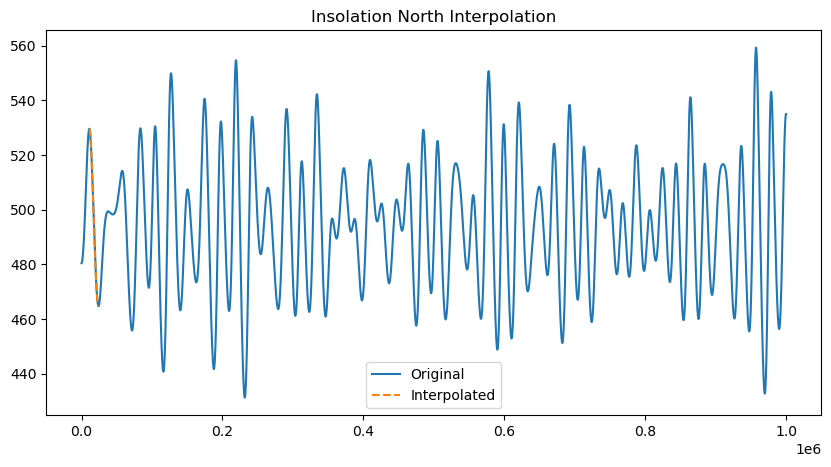

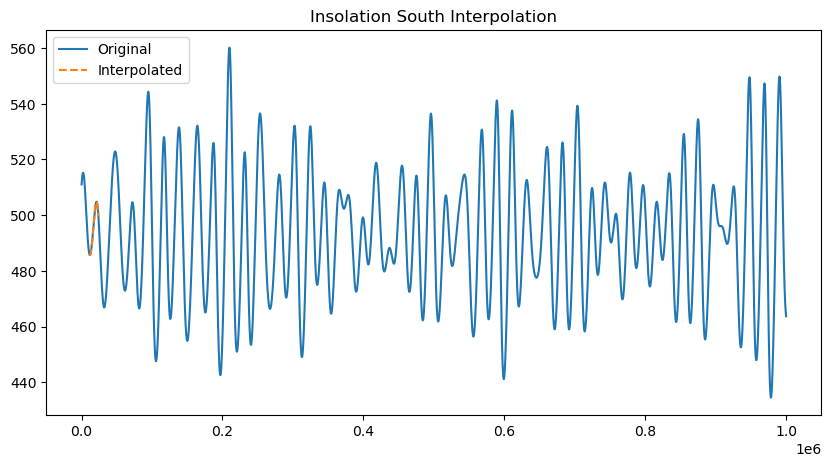

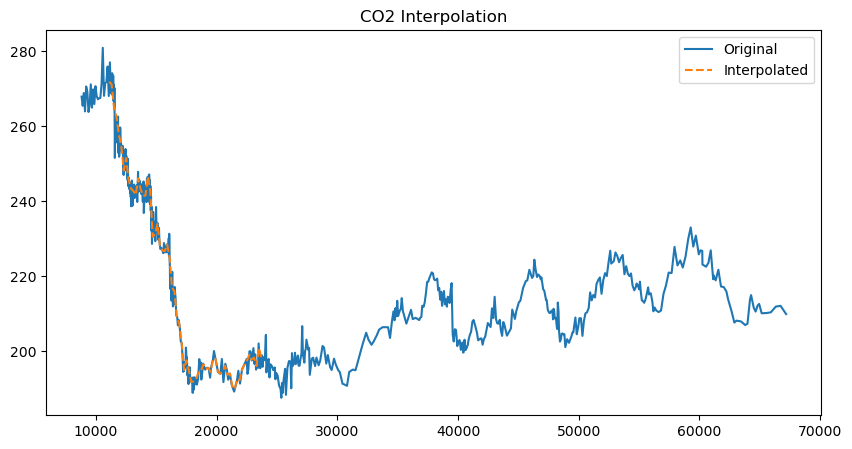

In [35]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# crop the LGMR age to 11000 to 24000
LGRM_age = LGRM_age[(LGRM_age >= 11000) & (LGRM_age <= 24000)]

# Convert DataFrame to ndarray
inso60n_array = inso60n.to_numpy()
inso60s_array = inso60s.to_numpy()
co2_array = df_wdc_co2.to_numpy()

# Interpolation function
def interpolate_data(original_data, new_ages):
    interp_func = interp1d(original_data[:, 0], original_data[:, 1], kind='linear', fill_value="extrapolate")
    return interp_func(new_ages)

# Interpolate using LGRM_age
inso60n_interpolated = interpolate_data(inso60n_array, LGRM_age)
inso60s_interpolated = interpolate_data(inso60s_array, LGRM_age)
co2_interpolated = interpolate_data(co2_array, LGRM_age)

# Plot original and interpolated data
plt.figure(figsize=(10, 5))
plt.plot(inso60n_array[:, 0], inso60n_array[:, 1], label='Original')
plt.plot(LGRM_age, inso60n_interpolated, label='Interpolated', linestyle='--')
plt.legend()
plt.title('Insolation North Interpolation')
plt.show()

# Plot original and interpolated data for insolation South
plt.figure(figsize=(10, 5))
plt.plot(inso60s_array[:, 0], inso60s_array[:, 1], label='Original')
plt.plot(LGRM_age, inso60s_interpolated, label='Interpolated', linestyle='--')
plt.legend()
plt.title('Insolation South Interpolation')
plt.show()

# Plot original and interpolated data for CO2
plt.figure(figsize=(10, 5))
plt.plot(co2_array[:, 0], co2_array[:, 1], label='Original')
plt.plot(LGRM_age, co2_interpolated, label='Interpolated', linestyle='--')
plt.legend()
plt.title('CO2 Interpolation')
plt.show()



# save the inso60n_interpolated to 'processed_data' uinsg pickle
with open('D:/VScode/Last_deglaciation_causality/processed_data/inso60n_interpolated.pkl', 'wb') as file:
    pickle.dump(inso60n_interpolated, file)

# save the inso60s_interpolated to 'processed_data' uinsg pickle
with open('D:/VScode/Last_deglaciation_causality/processed_data/inso60s_interpolated.pkl', 'wb') as file:
    pickle.dump(inso60s_interpolated, file)

# save the co2_interpolated to 'processed_data' uinsg pickle
with open('D:/VScode/Last_deglaciation_causality/processed_data/co2_interpolated.pkl', 'wb') as file:
    pickle.dump(co2_interpolated, file)


In [36]:
# load the co2_interpolated

import pickle
with open('D:/VScode/Last_deglaciation_causality/processed_data/co2_interpolated.pkl', 'rb') as f:
    co2_interpolated = pickle.load(f)